## Optimizing Home Availability for Online Deliveries

### 1. Introduction

**Welcome to my very first data science project!** I’m excited to finally apply the skills I've developed recently.

As a frequent online shopper, I appreciate the convenience and cost-effectiveness of e-commerce. However, in Brazil, receiving packages requires being home, as deliveries are handed over in person due to security concerns. 

This led me to a recurring problem: **When is it safest to leave home without missing a delivery?** Are there predictable patterns in delivery times that could help optimize my schedule?  

To answer this question, I retrieved delivery data from my emails, which contain notifications from the two e-commerce platforms I use most frequently: Shopee and MercadoLivre. My dataset includes:  
- Date and time of each delivery
- E-commerce platform responsible for the shipment  

Through this project, I aim to uncover any predictable patterns in delivery schedules, helping me optimize daily routines around expected package arrivals.

Here’s what you can expect from this analysis:
- **Data Collection and Preparation**: A quick look at how I compiled and prepared the dataset for analysis.
- **Exploratory Data Analysis (EDA)**: Visualizations and statistical summaries to highlight the most common delivery times.
- **Insights**: Practical takeaways for scheduling outings that minimize the risk of missing a delivery.

Let’s dive in!

_Imagem: Package_delivery_

### 2. Data ###

#### 2.1. Data Collection ####

To accurately track delivery times, I used Mozilla Thunderbird, my email platform, to filter and export delivery confirmation emails from 2024. These emails are typically sent 2–3 minutes after a package is received, making them a reliable proxy for actual delivery times.  

Thunderbird allows saving emails as .eml files, so I organized all relevant emails into separate folders for each online marketplace. Each file name contained the **email subject** (in Portuguese), **date**, and **time**, making the relevant details easily available.

To extract and organize the timestamps efficiently, I used the **Windows Command Prompt** to generate a `.txt` file with the filenames from each folder:  

```sh
dir /b > shopee_emails.txt  (in the Shopee email folder)
dir /b > mercadolivre_emails.txt  (in the MercadoLivre email folder)
```

This command lists all filenames in the directory and exports them to a text file. These timestamped filenames served as the foundation for the dataset creation.

The first lines of each file are shown in Figure 1.

_Image: MercadoLivre_and_Shopee_emails_txt.png_

Figure 1: First lines from the text files listing email filenames showing subject, date, and time

SEO: First  lines from the text files listing email filenames showing subject, date, and time

In [12]:
# Define file paths
shopee_emails = r"D:\Data Science & NLP\Portfolio\Optimizing Home Availability for Online Deliveries\shopee_emails.txt"
mercadolivre_emails = r"D:\Data Science & NLP\Portfolio\Optimizing Home Availability for Online Deliveries\mercadolivre_emails.txt"

# Read Shopee file
with open(shopee_emails, "r", encoding="utf-8") as file:
    print("\nShopee Emails:\n")
    for _ in range(10):
        print(file.readline().strip())

# Read MercadoLivre file
with open(mercadolivre_emails, "r", encoding="cp1252") as file:
    print("\nMercadoLivre Emails:\n")
    for _ in range(10):
        print(file.readline().strip())


Shopee Emails:

Oba! Seu pedido #231231KFNWV01C foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-06 1118.eml
Oba! Seu pedido #231231KS1XG1AC foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-05 1236.eml
Oba! Seu pedido #240115USFDQFVB foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-20 1454.eml
Oba! Seu pedido #2401199GJY5UE3 foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-26 1652.eml
Oba! Seu pedido #240120BV017FDV foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-29 1322.eml
Oba! Seu pedido #240122GXTNK7RW foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-29 1322.eml
Oba! Seu pedido #240124QCUN8EK2 foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-29 1322.eml
Oba! Seu pedido #240124QJTAV03E foi entregue - Shopee (info@mail.shopee.com.br) - 2024-02-01 1038.eml
Oba! Seu pedido #240124QJTAV03F foi entregue - Shopee (info@mail.shopee.com.br) - 2024-01-31 1100.eml
Oba! Seu pedido #240124QJTAV03G foi entregue - Shopee (info@mail.

####  2.2. Data Validation ####
A review of the `.txt` files confirmed that all email headings followed a consistent pattern, with no anomalies or irregular formatting. Since the extracted filenames were already well-structured, **no additional cleaning was required in this stage**, and I could proceed directly to filtering the data and organizing it into a structured format for further analysis.

#### 2.3. DataFrame creation ####

After extracting and validating the filenames with the email headings, the next step was to structure the data into a **Pandas DataFrame** for analysis. Since the filenames contain the **date and time** of each delivery, I used **regex** to extract these timestamps and convert them into a proper datetime format.  

Additionally, I added a `platform` column to differentiate between deliveries from Shopee and MercadoLivre. This structured format will enable further exploration of delivery patterns, such as which times of day or days of the week deliveries are most likely to occur.  

In [291]:
import pandas as pd
import re

# Define file paths
shopee_emails = r"D:\Data Science & NLP\Portfolio\Optimizing Home Availability for Online Deliveries\shopee_emails.txt"
mercadolivre_emails = r"D:\Data Science & NLP\Portfolio\Optimizing Home Availability for Online Deliveries\mercadolivre_emails.txt"

# Function to extract date and time using regex
def extract_datetime(filename):
    match = re.search(r"(\d{4}-\d{2}-\d{2}) (\d{4})", filename)
    if match:
        date, time = match.groups()  # Return the captured groups from the regex pattern
        formatted_time = f"{time[:2]}:{time[2:]}"  # Convert HHMM to HH:MM
        return f"{date} {formatted_time}"
    return None  # Return None if no match is found

# Load Shopee emails
with open(shopee_emails, "r", encoding="utf-8") as file:
    shopee_data = [{"Datetime": extract_datetime(line.strip()), "Platform": "Shopee"} for line in file]

# Load MercadoLivre emails
with open(mercadolivre_emails, "r", encoding="ISO-8859-1") as file:
    mercadolivre_data = [{"Datetime": extract_datetime(line.strip()), "Platform": "MercadoLivre"} for line in file]

# Combine data and create DataFrame
deliveries = pd.DataFrame(shopee_data + mercadolivre_data)

# Convert 'datetime' column to datetime format
deliveries["Datetime"] = pd.to_datetime(deliveries["Datetime"], format="%Y-%m-%d %H:%M")

These are the first lines of the **resulting DataFrame**:

_Image: DataFrame_Head.png_

Figure 2: Preview of the DataFrame Head

SEO: The image displays the first few rows of the DataFrame created from the email filenames, showing details such as subject, date, and time.

In [103]:
print(deliveries.head())

             Datetime Platform
0 2024-01-06 11:18:00   Shopee
1 2024-01-05 12:36:00   Shopee
2 2024-01-20 14:54:00   Shopee
3 2024-01-26 16:52:00   Shopee
4 2024-01-29 13:22:00   Shopee


In [111]:
deliveries.head()

,Datetime,Platform
0,2024-01-06 11:18:00,Shopee
1,2024-01-05 12:36:00,Shopee
2,2024-01-20 14:54:00,Shopee
3,2024-01-26 16:52:00,Shopee
4,2024-01-29 13:22:00,Shopee


Here is the number of delivery notifications extracted from my emails:

_Image: Platform_Count.png_

Figure 3: Delivery Notifications Count by Platform

SEO: This table summarizes the total delivery notifications for each online marketplace.

In [107]:
deliveries.value_counts('Platform')

Platform
MercadoLivre    123
Shopee          102
Name: count, dtype: int64

#### 2.4. Handling Duplicate Values ####

I suspected that when I purchase multiple items separately and they are delivered together, the platform sometimes sends **multiple confirmation emails** for the same delivery. After checking the source data in my email, I confirmed this was happening.  

To ensure each delivery is counted only once, I **removed duplicate timestamps** before proceeding with the analysis.  

In [293]:
# Remove duplicates
deliveries = deliveries.drop_duplicates(subset=["Datetime"])

# Display updated count
print("\nDeliveries per platform after removing duplicates:\n")
print(deliveries["Platform"].value_counts())


Deliveries per platform after removing duplicates:

Platform
MercadoLivre    100
Shopee           88
Name: count, dtype: int64


 Figure 4 displays the count of delivery notifications for each platform after duplicate entries have been removed.

_Image: Platform_Count_No_Duplicates.png_

Figure 4: Unique Delivery Notifications by Platform

SEO: Deliveries per platform after removing duplicates


#### 2.5. Sanity Check ####

Now that the data has been collected and processed, it's important to pause and review the results. After removing duplicate entries, the final dataset shows 100 deliveries from MercadoLivre and 88 from Shopee—a total of **188 deliveries per year**. Does this number make sense?

This averages to roughly **3.6 deliveries per week**. Considering my frequent online shopping—from groceries and clothing to personal care and household items—this figure aligns well with my personal experience. With this sanity check confirming that the numbers are realistic, I can move on to analyzing the delivery trends.

### 3. Exploratory Data Analysis (EDA) ###

This section explores various aspects of the delivery data, divided into two subsections. The first subsection examines **weekly delivery patterns** using a grouped bar chart, and the second focuses on **hourly distributions** using a histogram and percentiles.

#### 3.1. Weekly Delivery Patterns ####

In this first analysis, I examine the distribution of deliveries by day of the week to identify potential patterns. I used a **grouped bar chart** for this visualization, as it allows a straightforward comparison of the number of deliveries for each platform across the days of the week.

In [457]:
# Reset Seaborn settings to default for future plots
sns.reset_defaults()  

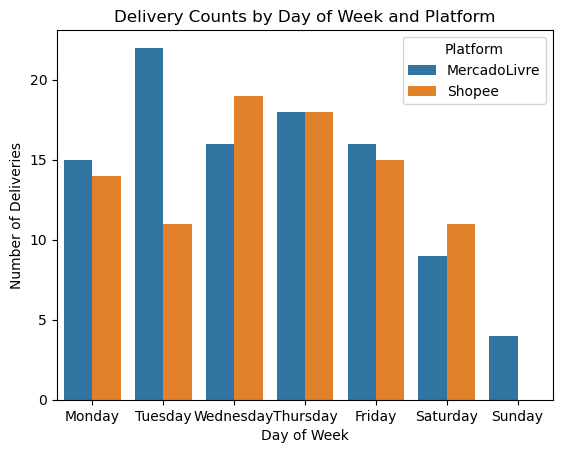

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract day of the week
deliveries["DayOfWeek"] = deliveries["Datetime"].dt.day_name()

# Define the order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create a grouped bar chart
plt.figure()
sns.barplot(
    data=delivery_counts,
    x="DayOfWeek",
    y="Count",
    hue="Platform",
    order=days_order
)

# Set the x-axis label, y-axis label, and plot title
plt.xlabel("Day of Week")
plt.ylabel("Number of Deliveries")
plt.title("Delivery Counts by Day of Week and Platform")

# Save the figure to the specified local folder
save_path = r"D:\Data Science & NLP\Portfolio\Optimizing Home Availability for Online Deliveries\Blog or website images\delivery_counts_by_day.png"
plt.savefig(save_path, dpi=300, format="png")

# Display the plot
plt.show()

_Image: delivery_counts_by_day.png_

Figure 5: Delivery Counts by Day of Week and Platform

SEO: same

Here are some insights based on Figure 5:

- **Mid-Week Peaks**  
   - **MercadoLivre** reaches its highest delivery volume on **Tuesday**, while **Shopee** peaks on **Wednesday**.
<br>
<br>
- **Weekend Decline**  
   - Both platforms see a drop in deliveries on **Saturday**. Notably, **Shopee** registers no deliveries on **Sunday**, whereas **MercadoLivre** continues delivering—though at a considerably lower volume.
<br>
<br>
- **Consistency**  
   - Delivery counts on **Monday**, **Thursday**, and **Friday** are relatively similar between the two platforms.

#### 3.2. Delivery Time Distribution: Histograms ####

This section explores how delivery times vary throughout the day across the platforms. By comparing them side by side, we can pinpoint the peak and off-peak hours for deliveries.

Figure 6 presents a histogram that displays the number of deliveries recorded each hour—from 6 AM to 10 PM—for each platform. This visualization offers a clear overview of the hourly delivery patterns.

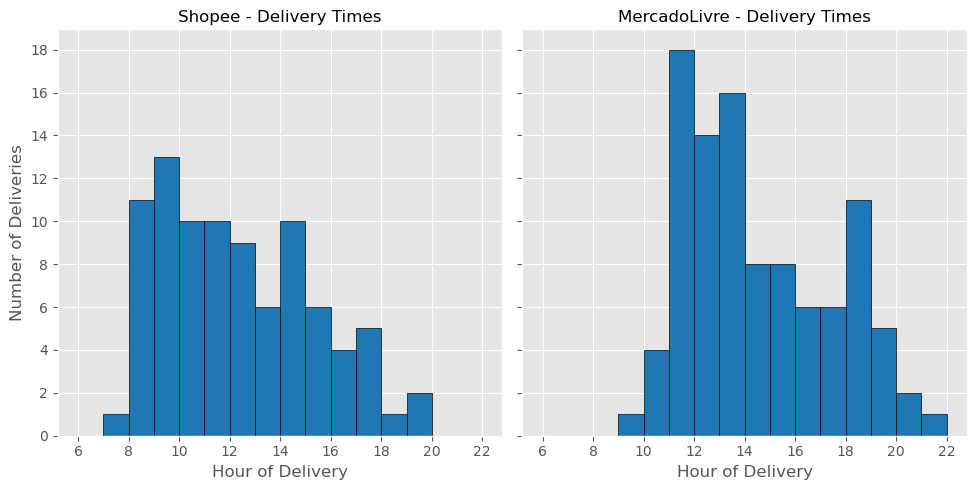

In [332]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Extract the hour
deliveries["Hour"] = deliveries["Datetime"].dt.hour

# Apply ggplot style
plt.style.use('ggplot')  

# Create faceted histograms to visualize hourly delivery distribution by platform
g = sns.displot(
    data=deliveries,
    x="Hour",
    bins=range(6, 23),
    col="Platform",
    facet_kws={"sharey": True},
    edgecolor="black",
    color="#1f77b4",
    alpha=1
)

# Set the x-axis label, y-axis label, and plot title
g.set_axis_labels("Hour of Delivery", "Number of Deliveries")
g.set_titles("{col_name} - Delivery Times")

# Configure y-axis to display only integer tick marks
for ax in g.axes.flat:
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Save the plot as an image
save_path = r"D:\Data Science & NLP\Portfolio\Optimizing Home Availability for Online Deliveries\Blog or website images\hourly_delivery_distribution.png"
g.fig.savefig(save_path, dpi=300, format="png")

# Display the plot
plt.show()

# Reset Seaborn settings to default for future plots
sns.reset_defaults()  

_Image: hourly_delivery_distribution.png_

**Figure 6: Hourly Delivery Distribution by Platform** 

SEO: same

Key Observations from Figure 6:

- **Shopee's Morning Advantage**  
   - Shopee experiences higher delivery volume in the morning compared to the afternoon, with only a few deliveries occurring before 8 a.m. or after 6 p.m.
<br><br>

- **MercadoLivre's Midday Peak**  
   - MercadoLivre deliveries peak around midday, with most activity starting around 10 a.m. and extending into the evening.
<br><br>

- **Similar Operating Range**  
   - Both platforms operate over a similar 13-hour window, although their peak delivery times differ, highlighting distinct daily patterns.

#### 3.3. Delivery Time Distribution: 95% Interval ####

Now that I have a clear picture of the daily delivery patterns, it's time to tackle the key question: **When is it safest to leave home without missing a delivery?** 

I reframed this as: at what times can I step out with only a 5% or lower risk of missing a package—in other words, **which time interval contains 95% of the deliveries for each platform?**

To answer this, I calculated the **2.5th and 97.5th percentiles of delivery times for each platform**. The resulting intervals—displayed in Figure 7—represent the windows during which 95% of deliveries occur.

In [429]:
import pandas as pd
import numpy as np

# Convert each Datetime entry to total seconds
deliveries["TimeOfDaySeconds"] = (
    deliveries["Datetime"].dt.hour * 3600
    + deliveries["Datetime"].dt.minute * 60
    + deliveries["Datetime"].dt.second
)

# Calculate 2.5th and 97.5th percentiles for each platform
percentiles = (
    deliveries
    .groupby("Platform")["TimeOfDaySeconds"]
    .quantile([0.025, 0.975])
    .unstack()
)

# Rename the columns for clarity purposes
percentiles.columns = ["2.5th_percentile", "97.5th_percentile"]

# Convert seconds back to HH:MM:SS
percentiles["2.5th_percentile"] = pd.to_datetime(percentiles["2.5th_percentile"], unit='s').dt.strftime('%H:%M:%S')
percentiles["97.5th_percentile"] = pd.to_datetime(percentiles["97.5th_percentile"], unit='s').dt.strftime('%H:%M:%S')

print(percentiles)

             2.5th_percentile 97.5th_percentile
Platform                                       
MercadoLivre         10:25:39          19:56:18
Shopee               08:12:21          17:59:30


_Image: Percentiles.png_

**Figure 7: Delivery Time Percentiles by Platform**

SEO: This table displays the 2.5th and 97.5th percentiles of delivery times for each platform, expressed in HH:MM:SS.

### 4. Conclusion

In this project, I sought to uncover patterns in the delivery times of the e-commerce platforms I use most, with the goal of identifying time windows where I can safely leave home with minimal risk of missing a package. To do so, I collected raw data from my email platform, transformed it into a structured format, and validated the data.

The analysis, supported by a grouped bar chart, histograms, and percentile calculations, revealed some notable differences between the platforms. The weekday analysis indicated that the most significant divergence occurs on weekends. MercadoLivre shows a marked decrease in deliveries on both Saturday and Sunday compared to weekdays, whereas Shopee continues to receive a considerable number of deliveries on Saturdays but none on Sundays.

By calculating the 2.5th and 97.5th percentiles of the delivery times, I determined that approximately 95% of deliveries occur within these intervals:
- **MercadoLivre:** from **10:26** to **19:56**.
- **Shopee:** from **08:12** to **17:59**.

While Shopee's delivery window is quite broad and begins early, making it harder to pinpoint a consistently safe period for outings, MercadoLivre's deliveries tend to start later in the day. This means that by planning outings before 10:30 AM, I can greatly reduce the chance of missing a MercadoLivre delivery.

Overall, this project has been an excellent opportunity to apply various data science concepts in a real-world context, demonstrating how data analysis can transform everyday decision-making into a more informed and efficient process.